In [10]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=400
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

import glob,os
from collections import Counter, defaultdict, namedtuple
from Bio import SeqIO

base_path='/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/'

In [24]:
samples=set() ## will contain list of samples that not water and with assembled contigs
for f in glob.glob(os.path.join(base_path,'../Combined_SENZOR_500_Filtered_Contigs/*.fa')):
    cs=SeqIO.parse(f,format='fasta') ## load contigs
    s={s.id:s.seq for s in cs} ## convert sequences to dict
    if len(s)>0 and 'water' not in f.lower(): ## check there's any contigs at all and that contigs aren't water
        samples.add(os.path.basename(os.path.dirname(f))) ## add sample
        
virus_sample_combinations=set()
for line in open(os.path.join(base_path,'RNA_contig_calls.tsv'),'r'):
    l=line.strip('\n').split('\t')
    if l[0]=='sample':
        header={x: i for i,x in enumerate(l)}
    elif l[header['curated']]=='True':
        pol_group=int(float(l[header['poly_group']]))
        sample=l[header['sample']]
        virus_sample_combinations.add('%s|%s'%(pol_group,sample))

sample_virus_list={s.split('|')[1]: [w.split('|')[0] for w in virus_sample_combinations if w.split('|')[1]==s.split('|')[1]] for s in virus_sample_combinations}
for s in samples:
    if s not in sample_virus_list:
        sample_virus_list[s]=[]
        
virus_count={s:len(sample_virus_list[s]) for s in sample_virus_list}
sample_coinfections=Counter(virus_count)

for count in set(sample_coinfections.values()):
    S=[sample for sample in sample_coinfections if sample_coinfections[sample]==count]
    print('\nnumber of viruses: %d (in %d samples): %s'%(count,len(S),', '.join(S)))
    
out=open(os.path.join(base_path,'TableSX_RNA_coinfection.tsv'),'w')
out.write('sample\tpol_groups\n')

for sample in sample_virus_list:
    out.write('%s\t%s\n'%(sample,', '.join(sample_virus_list[sample])))
    
out.close()


number of viruses: 0 (in 1 samples): Combined_SENZOR_500_Filtered_Contigs

number of viruses: 1 (in 34 samples): SEZONOWIFRR031_LIV_S71_663085, AINWZ_GOT012_RS_S38_673479, SEZONOWOGR010_LIV_S56_666407, OD_ZAD_SQL028_LUNG_S18_673624, SEZONOWGOAT010_S65_2_656741, SEZONOWOGR001_LIV_S47_666398, AIMASHEEP003_S55_656080, AIAMASHEEP002_S54_656079, SEZONOWIFRR032_LIV_S72_666406, AINWZ_CHK003_CS_S49_673471, AINWZ_DOG006_RS_S42_674096, AINWZ_GOT009_RS_S68_673476, AINWZ_GOT008_OS_S67_673475, SEZONOWIFCAT001_S34_657717, AINWZ_DOG005_OS_S41_673473, SEZOOWISUGOAT002_S27_657721, SEZONOWOWISR001_LIV_S62_666415, SEZONOWISDOG015_S13_657743, AIMUZSHEEP001_S52_656081, SEZONOWOWISR005_LIV_S66_666419, AINWZR020_LIV_S20_663083, SEZOOWISDOG003_S11_657754, AINWZDOG002_S38_657735, SEZONOWISDOG008_S14_657742, SEZONOWDOG01_S7_657737, SEZONOWIFRR037_LIV_S77_666399, SEZ_ON_OWOG_R001_S75_687911, AINWZGOAT003_S43_1_656182, SEZOOWOGDOG019_S9_1_657762, SEZONOWOGR004_LIV_S50_666375, SEZONOWOGDOG017_S22_657753, SENONOWO

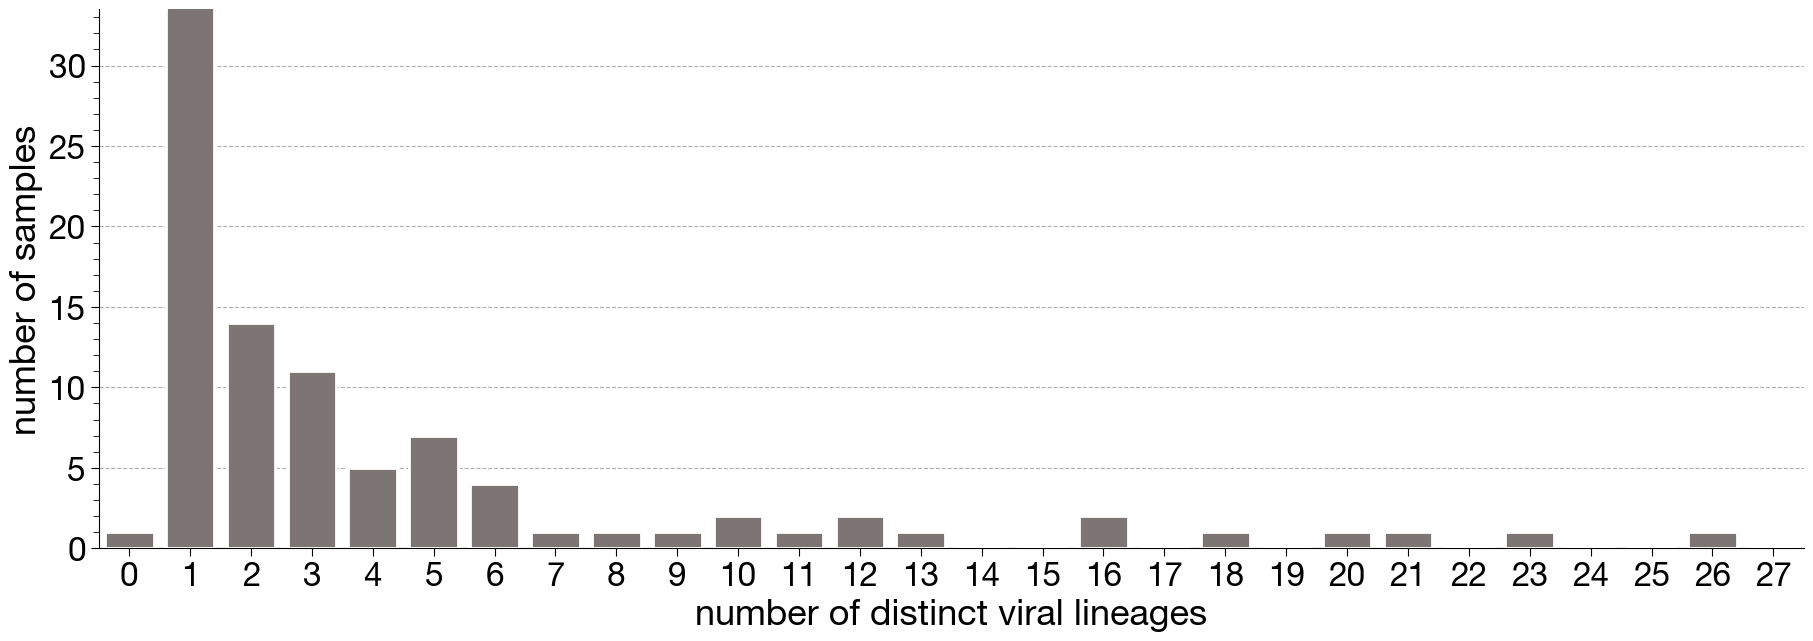

In [20]:
fig = plt.figure(figsize=(22,7),facecolor='w')
gs = gridspec.GridSpec(1,1)
ax=plt.subplot(gs[0],facecolor='w')

freqs=sample_coinfections.values()
bins=range(0,max(freqs)+3)
ax.hist(freqs,bins=bins,align='left',facecolor='#7C7574',edgecolor='w',rwidth=0.8,lw=2,zorder=10)

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
ax.set_xticks(bins)
ax.set_xlim(-0.5,max(bins)-0.5)
ax.set_ylim(0,33.5)

ax.grid(axis='y',ls='--')
ax.tick_params(which='major',size=6,labelsize=24)
ax.tick_params(which='minor',size=4,labelsize=0)

ax.set_ylabel('number of samples',size=26)
ax.set_xlabel('number of distinct viral lineages',size=26)

[ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['left','bottom']]

plt.savefig('/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/figS2_coinfection.pdf',dpi=300,bbox_inches='tight')
plt.savefig('/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/figS2_coinfection.png',dpi=300,bbox_inches='tight')
plt.show()


Number of distinct viruses: 0  (in 12 samples)
Samples: SAMPLE_ZERO_1, SAMPLE_ZERO_2, SAMPLE_ZERO_3, SAMPLE_ZERO_4, SAMPLE_ZERO_5, SAMPLE_ZERO_6, SAMPLE_ZERO_7, SAMPLE_ZERO_8, SAMPLE_ZERO_9, SAMPLE_ZERO_10, SAMPLE_ZERO_11, SAMPLE_ZERO_12

Number of distinct viruses: 1  (in 39 samples)
Samples: AIAMADOG001_S40_657732, AIAMA_SHP006_OS_S48_673466, OD_ZAD_BAT025_LUNG_S26_673506, AIAMAR018_LIV_S38_663049, AINWZ_GOT012_RS_S38_673479, AIAMAR010_LIV_S30_663038, AIAMAR016_LIV_S36_663047, AIAMAR011_LIV_S31_663039, OD_ZAD_SQL024_LIV_S14_673620, SEZONOWGOAT010_S65_2_656741, SEZONOWOGR001_LIV_S47_666398, OD_ZAD_SQL026_LUNG_S16_673622, AIAMAR019_LIV_S39_663050, AIMASHEEP003_S55_656080, AIMGBR022_LIV_S42_663077, AINWZ_DOG006_RS_S42_674096, AINWZ_GOT009_RS_S68_673476, AINWZ_GOT008_OS_S67_673475, SEZONOWIFCAT001_S34_657717, SEZONOWIFDOG009_S1_657740, AINWZ_DOG005_OS_S41_673473, SEZONOWISDOG015_S13_657743, AIMUZSHEEP001_S52_656081, AIAMAR003_LIV_S23_662108, AINWZR020_LIV_S20_663083, AIMGL_GOT004_RS_S66

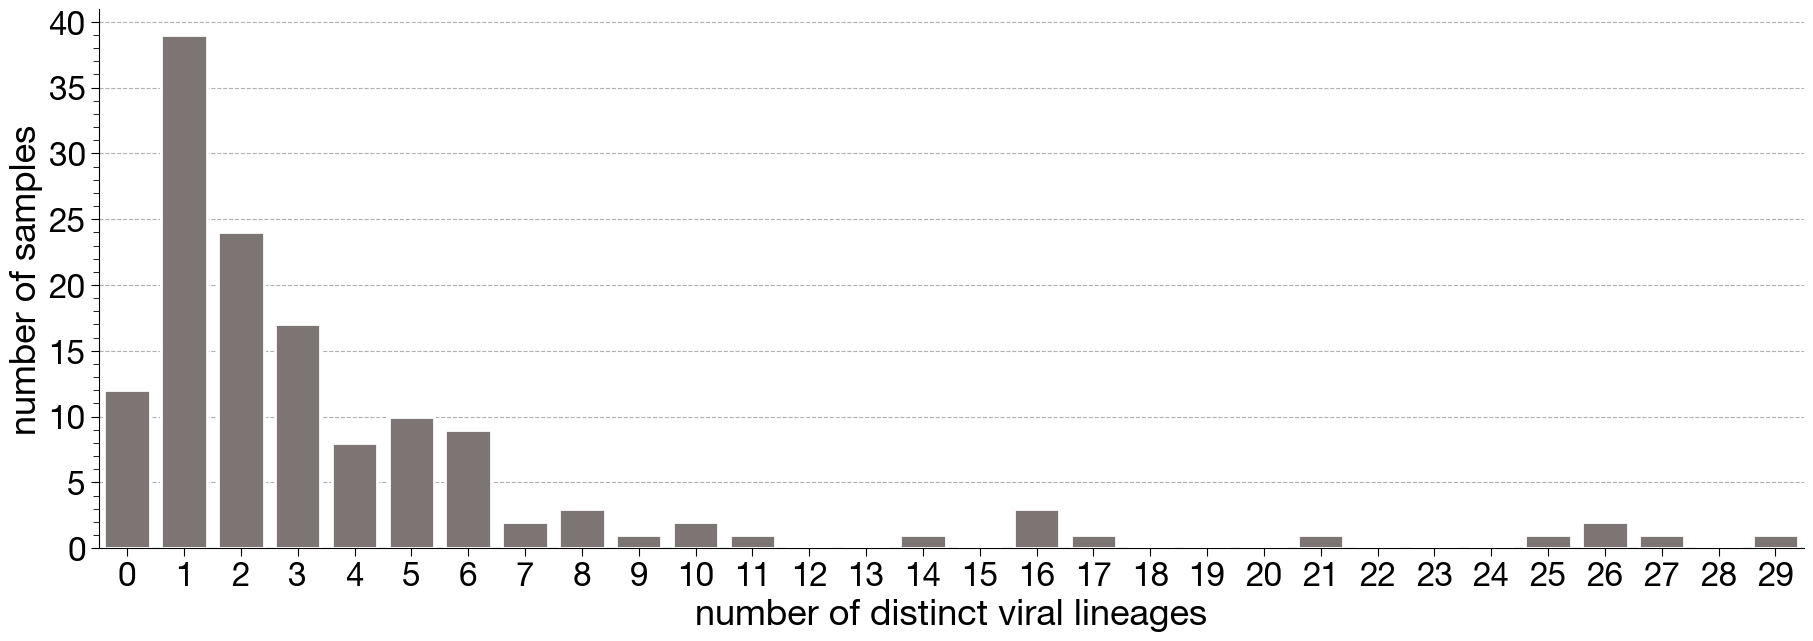

Saved figure to /Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results//figS2_coinfection.pdf and /Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results//figS2_coinfection.png


In [30]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec
import csv
from collections import defaultdict, Counter

# -- Adjust fonts/visuals as you had before --
typeface = 'Helvetica Neue'
mpl.rcParams['font.weight'] = 400
mpl.rcParams['axes.labelweight'] = 300
mpl.rcParams['font.family'] = typeface
mpl.rcParams['font.size'] = 22

base_path = '/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/'
input_tsv = f"{base_path}/DNA_RNA_virus_complete_SENZOR.txt"

# ---------------------------------------------------------------------
# 1) Read rows where curated == 'TRUE' and build (poly_group, sample)
# ---------------------------------------------------------------------
virus_sample_combinations = set()

with open(input_tsv, 'r', newline='') as f:
    reader = csv.DictReader(f, delimiter='\t')
    for row in reader:
        if row["curated"].strip().upper() == "TRUE":
            poly_group = row["poly_group"]
            sample     = row["sample"]
            virus_sample_combinations.add(f"{poly_group}|{sample}")

# ---------------------------------------------------------------------
# 2) Build a dictionary: sample -> list of poly_groups found
# ---------------------------------------------------------------------
sample_virus_list = defaultdict(list)
for combo in virus_sample_combinations:
    pg, smp = combo.split('|')
    sample_virus_list[smp].append(pg)

# ---------------------------------------------------------------------
# 3) Count how many distinct viruses (poly_groups) per sample
# ---------------------------------------------------------------------
virus_count = {smp: len(poly_groups) for smp, poly_groups in sample_virus_list.items()}

# ---------------------------------------------------------------------
# 4) Hard-code the 12 samples known to have 0 viruses
#    (Replace these placeholder names with your real sample IDs!)
# ---------------------------------------------------------------------
zero_virus_samples = [
    "SAMPLE_ZERO_1",
    "SAMPLE_ZERO_2",
    "SAMPLE_ZERO_3",
    "SAMPLE_ZERO_4",
    "SAMPLE_ZERO_5",
    "SAMPLE_ZERO_6",
    "SAMPLE_ZERO_7",
    "SAMPLE_ZERO_8",
    "SAMPLE_ZERO_9",
    "SAMPLE_ZERO_10",
    "SAMPLE_ZERO_11",
    "SAMPLE_ZERO_12"
]

for zsample in zero_virus_samples:
    if zsample not in virus_count:
        virus_count[zsample] = 0  # ensure they're counted as having 0 viruses

# ---------------------------------------------------------------------
# 5) Print a quick summary of how many samples have X number of viruses
# ---------------------------------------------------------------------
sample_coinfections = Counter(virus_count)
unique_counts = sorted(set(sample_coinfections.values()))
for cnt in unique_counts:
    these_samples = [s for s in sample_coinfections if sample_coinfections[s] == cnt]
    print(f"\nNumber of distinct viruses: {cnt}  (in {len(these_samples)} samples)")
    print("Samples:", ", ".join(these_samples))

# ---------------------------------------------------------------------
# 6) (Optional) Save a small summary table, if you like
# ---------------------------------------------------------------------
out_tsv = f"{base_path}/TableSX_RNA_coinfection.tsv"
with open(out_tsv, 'w', newline='') as out:
    out.write("sample\tpol_groups\n")
    for smp in sorted(virus_count):
        # If a sample has 0 viruses, sample_virus_list[smp] might be missing or empty
        pol_groups = sample_virus_list[smp] if smp in sample_virus_list else []
        groups_str = ", ".join(pol_groups)
        out.write(f"{smp}\t{groups_str}\n")
print(f"\nWrote table of co-infections to: {out_tsv}")

# ---------------------------------------------------------------------
# 7) Plot the histogram
# ---------------------------------------------------------------------
fig = plt.figure(figsize=(22, 7), facecolor='w')
gs = gridspec.GridSpec(1, 1)
ax = plt.subplot(gs[0], facecolor='w')

freqs = list(sample_coinfections.values())
max_count = max(freqs) if freqs else 0
bins = range(0, max_count + 2)  # +2 so there's room for the highest count

ax.hist(freqs,
        bins=bins,
        align='left',
        facecolor='#7C7574',
        edgecolor='w',
        rwidth=0.8,
        lw=2,
        zorder=10)

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
ax.set_xticks(bins)
ax.set_xlim(-0.5, max(bins) - 0.5)
ax.set_ylim(0, None)

ax.grid(axis='y', ls='--')
ax.tick_params(which='major', size=6, labelsize=24)
ax.tick_params(which='minor', size=4, labelsize=0)

ax.set_ylabel('number of samples', size=26)
ax.set_xlabel('number of distinct viral lineages', size=26)

for loc in ['right','top']:
    ax.spines[loc].set_visible(False)

pdf_out = f"{base_path}/figS2_coinfection.pdf"
png_out = f"{base_path}/figS2_coinfection.png"
plt.savefig(pdf_out, dpi=300, bbox_inches='tight')
plt.savefig(png_out, dpi=300, bbox_inches='tight')
plt.show()

print(f"Saved figure to {pdf_out} and {png_out}")


2025-01-17 10:24:24,132 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:24:24,132 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:24:24,132 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:24:24,132 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:24:24,132 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:24:24,132 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:24:24,132 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:24:24,132 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:24:24,132 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:24:24,132 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:24:24,132 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:24:24,132 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:24

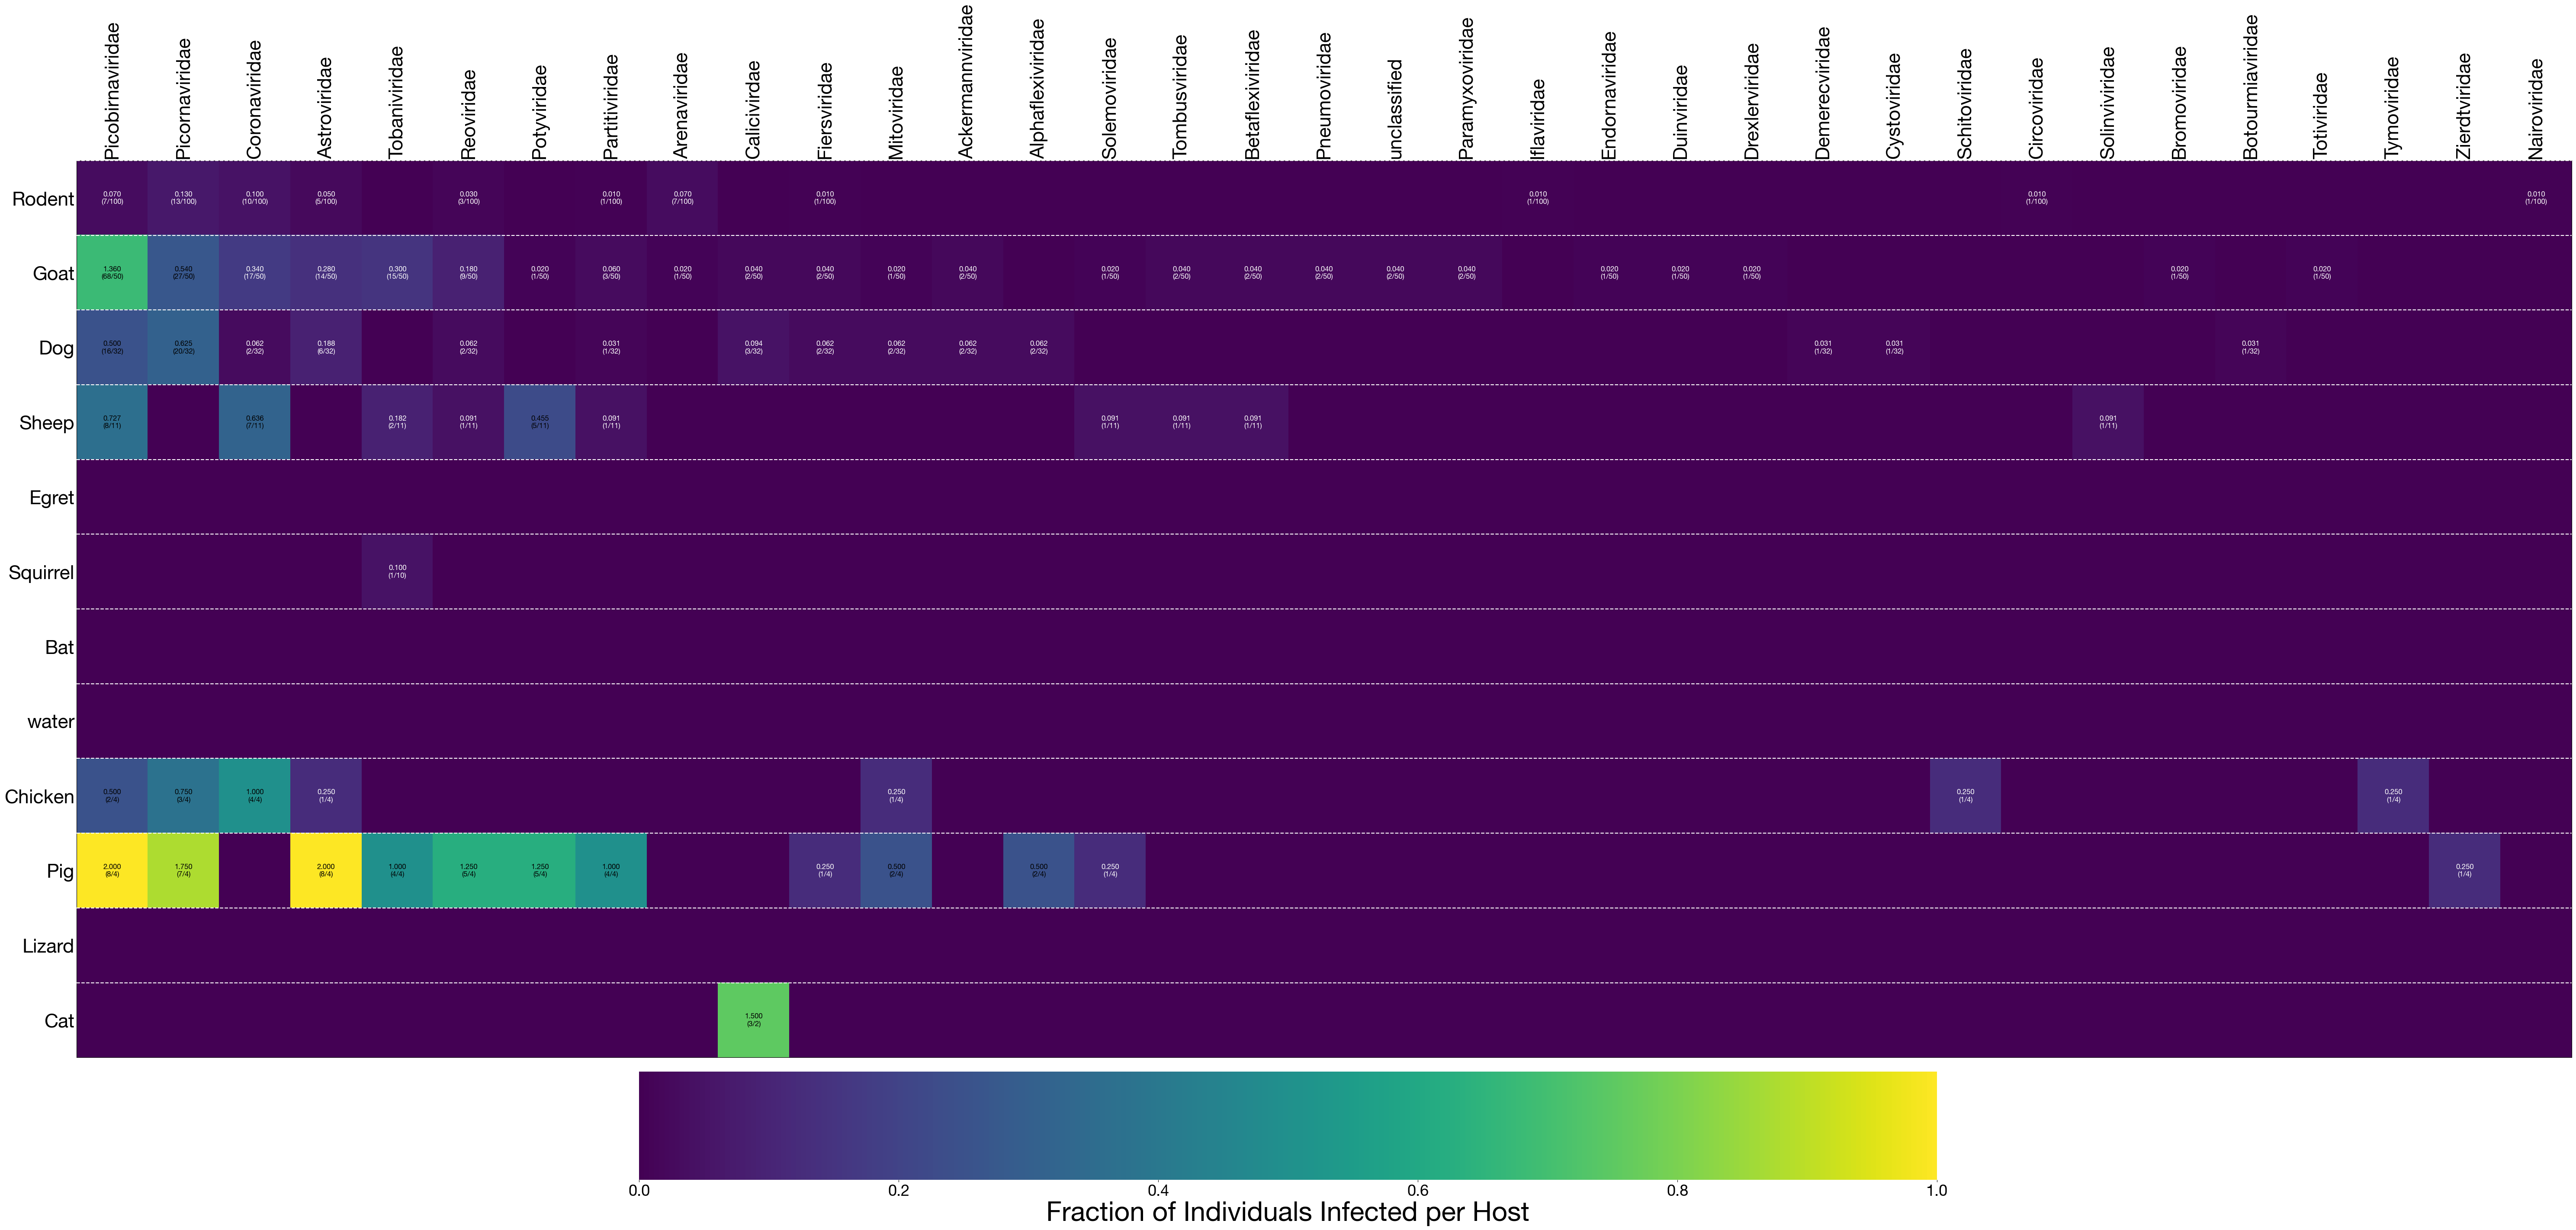

2025-01-17 10:25:10,746 - INFO - Displayed heatmap.
2025-01-17 10:25:10,746 - INFO - Displayed heatmap.
2025-01-17 10:25:10,746 - INFO - Displayed heatmap.
2025-01-17 10:25:10,746 - INFO - Displayed heatmap.
2025-01-17 10:25:10,746 - INFO - Displayed heatmap.
2025-01-17 10:25:10,746 - INFO - Displayed heatmap.
2025-01-17 10:25:10,746 - INFO - Displayed heatmap.
2025-01-17 10:25:10,746 - INFO - Displayed heatmap.
2025-01-17 10:25:10,746 - INFO - Displayed heatmap.
2025-01-17 10:25:10,746 - INFO - Displayed heatmap.
2025-01-17 10:25:10,746 - INFO - Displayed heatmap.
2025-01-17 10:25:10,746 - INFO - Displayed heatmap.
2025-01-17 10:25:10,746 - INFO - Displayed heatmap.
2025-01-17 10:25:10,746 - INFO - Displayed heatmap.


In [43]:
import os
import json
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import logging

def setup_logging():
    """
    Set up logging to file and console.
    """
    logger = logging.getLogger()
    logger.setLevel(logging.DEBUG)
    
    # File handler
    fh = logging.FileHandler('unmatched_samples.log')
    fh.setLevel(logging.WARNING)
    
    # Console handler
    ch = logging.StreamHandler()
    ch.setLevel(logging.INFO)
    
    # Formatter
    formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
    fh.setFormatter(formatter)
    ch.setFormatter(formatter)
    
    # Add handlers
    logger.addHandler(fh)
    logger.addHandler(ch)
    
    return logger

def load_metadata(csv_path):
    """
    Load metadata from a CSV file into a pandas DataFrame.

    Parameters:
        csv_path (str): Path to the Metada_annotated.csv file.

    Returns:
        pd.DataFrame: DataFrame containing the metadata.
    """
    try:
        metadata_df = pd.read_csv(csv_path, sep=',')
        logging.info("Successfully loaded metadata as comma-separated.")
    except Exception as e:
        logging.error(f"Failed to load metadata CSV: {e}")
        raise e
    
    # Strip whitespace from column names
    metadata_df.columns = metadata_df.columns.str.strip()
    
    # Check for required columns
    required_columns = ['NewID', 'ska_genus', 'ska_species']
    for col in required_columns:
        if col not in metadata_df.columns:
            logging.error(f"Missing required column '{col}' in metadata.")
            raise KeyError(f"Missing required column '{col}' in metadata.")
    
    # Set 'NewID' as the index for easy lookup
    metadata_df.set_index('NewID', inplace=True)
    
    logging.info(f"Loaded metadata for {len(metadata_df)} samples.")
    return metadata_df

def map_viruses_to_species(virus_dict, metadata_df):
    """
    Map each virus to the species of its associated samples, using NewID as the index.
    
    Returns:
        dict: vir_species -> {virus_id -> {species_name -> count}}
        set: species (unique set of species names)
        Counter: spp_count (counts of how many times each species appears)
    """
    # Use just the 'ska_species' as the "FullTaxonName"
    # or combine genus + species if you prefer
    metadata_df["FullTaxonName"] = metadata_df["ska_species"].str.strip()
    
    # Gather list of all species names
    species_list = metadata_df["FullTaxonName"].tolist()
    species = set(species_list)
    spp_count = Counter(species_list)
    
    # Initialize virus->(species->count)
    vir_species = {
        virus_id: {s: 0 for s in species} 
        for virus_id in virus_dict
    }
    logging.info(f"Initialized vir_species for {len(virus_dict)} viruses.")
    
    unmatched_samples = set()
    
    # For each virus, look at the 'samples' array and match them to NewID in metadata
    for virus_id, virus_info in virus_dict.items():
        samples = virus_info.get("samples", [])
        for sample_id in samples:
            if sample_id in metadata_df.index:
                species_name = metadata_df.at[sample_id, "FullTaxonName"]
                vir_species[virus_id][species_name] += 1
            else:
                if sample_id not in unmatched_samples:
                    logging.warning(
                        f"Sample ID '{sample_id}' from virus '{virus_id}' not found in metadata."
                    )
                    unmatched_samples.add(sample_id)
    
    logging.info(f"Total unmatched samples: {len(unmatched_samples)}")
    return vir_species, species, spp_count

def summarize_by_family(vir_species, virus_dict):
    """
    Aggregate virus counts by their family. This yields a new dictionary:
        family_species -> {family_name -> {species_name -> total_count}}
    """
    family_species = {}
    
    # We'll take one 'species->count' dict to see all possible species
    # (since they all share the same set of species keys)
    all_species = next(iter(vir_species.values())).keys() if vir_species else []
    
    for virus_id, species_counts in vir_species.items():
        # Get family name or use a placeholder
        family_name = virus_dict[virus_id].get("family", "Unknown_Family")
        
        # Ensure this family is in our aggregator
        if family_name not in family_species:
            family_species[family_name] = {s: 0 for s in all_species}
        
        # Accumulate counts
        for sp, count in species_counts.items():
            family_species[family_name][sp] += count
    
    return family_species

def prepare_dataframe_family(family_species, species, spp_count):
    """
    Create a normalized DataFrame from family_species dict:
        Rows = species
        Columns = families
    Normalize by the total number of individuals for each species (spp_count).
    """
    # Create a DataFrame from family_species
    df = pd.DataFrame.from_dict(family_species, orient='index')  # families -> index
    logging.info(f"DataFrame shape before transpose: {df.shape}")
    
    # Now transpose so species are rows, families are columns
    df = df.T
    logging.info(f"DataFrame shape after transpose: {df.shape}")
    
    # Sort families by total count across all species (descending)
    df = df.loc[:, df.sum(axis=0).sort_values(ascending=False).index]
    
    # Sort species by highest count, then alphabetically
    sorted_species = sorted(species, key=lambda w: (-spp_count[w], w))
    df = df.loc[sorted_species]
    
    # Normalize each row (species) by the species count
    df_normalized = df.div(spp_count, axis='index')
    return df_normalized

def generate_heatmap(df_normalized, family_species, species, spp_count):
    """
    Generate and display a heatmap of fraction of individuals infected per species, grouped by virus family.
    """
    fig = plt.figure(figsize=(60, 25), facecolor='w')
    gs = gridspec.GridSpec(1, 1)
    ax = plt.subplot(gs[0], facecolor='w')
    
    # Create the heatmap
    heatmap = ax.matshow(df_normalized, cmap=mpl.cm.viridis)
    logging.info("Created heatmap matrix.")
    
    # For annotation, we need to know the absolute counts (family_species) for each family x species
    # family_species = {family -> {species -> count}}
    for c, family_name in enumerate(df_normalized.columns):
        for r, sp_name in enumerate(df_normalized.index):
            count = family_species[family_name][sp_name]
            if count > 0:
                total = spp_count[sp_name]
                frac = count / total
                # Choose text color
                fc = 'k' if frac >= 0.4 else 'w'
                ax.text(
                    c, r, f"{frac:.3f}\n({count}/{total})",
                    color=fc, va='center', ha='center', fontsize=12
                )
    
    # Optionally separate out different "genus" lines on the y-axis
    store_genus = None
    for s_idx, sp_name in enumerate(df_normalized.index):
        genus = sp_name.split()[0]  # e.g. "Goat", "Pig", etc.
        if genus != store_genus:
            ax.axhline(s_idx - 0.5, color='w', ls='--', zorder=100)
            store_genus = genus
    
    # Set y-axis labels (species)
    ax.set_yticks(range(len(df_normalized.index)))
    ax.set_yticklabels(df_normalized.index, style='italic', fontsize=100)
    
    # Set x-axis labels (family names)
    ax.xaxis.tick_top()
    ax.set_xticks(range(len(df_normalized.columns)))
    ax.set_xticklabels(df_normalized.columns, rotation=90, fontsize=100)
    
    ax.tick_params(size=0, labelsize=32)
    ax.set_aspect('auto')
    
    # Add colorbar
    axcb = fig.add_axes([0.25, -0.1, 0.5, 0.1], frame_on=False)
    cb = mpl.colorbar.ColorbarBase(
        axcb,
        cmap=mpl.cm.viridis,
        orientation='horizontal',
        alpha=1.0,
        drawedges=False
    )
    cb.set_label('Fraction of Individuals Infected per Host', fontsize=45)
    cb.ax.tick_params(labelsize=26)
    
    plt.tight_layout()
    
    # Save the figure in multiple formats
    plt.savefig("/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/coinfection_heatmap_family.png", dpi=300)
    plt.savefig("/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/coinfection_heatmap_family.pdf", dpi=300)
    plt.savefig("/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/coinfection_heatmap_family.svg", dpi=300)
    
    plt.show()
    logging.info("Displayed heatmap.")

def main():
    """
    Main function to execute the data processing and visualization.
    """
    logger = setup_logging()
    
    # Define the base path
    base_path = '/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/'  # <-- Adjust as needed
    
    # Define paths to data
    metadata_csv = os.path.join(base_path, 'Metada_annotated.csv')
    virus_json = os.path.join(base_path, 'virus_RNA.json')
    
    # Check files
    if not os.path.exists(metadata_csv):
        logging.error(f"Metadata CSV file not found at '{metadata_csv}'. Please check the path.")
        return
    if not os.path.exists(virus_json):
        logging.error(f"Virus JSON file not found at '{virus_json}'. Please check the path.")
        return
    
    # Load metadata
    try:
        metadata_df = load_metadata(metadata_csv)
    except Exception as e:
        logging.error(f"Failed to load metadata: {e}")
        return
    
    # Load virus data
    try:
        with open(virus_json, 'r') as in_json:
            virus = json.load(in_json)
            logging.info(f"Loaded virus data with {len(virus)} entries.")
    except json.JSONDecodeError as e:
        logging.error(f"Error loading JSON file: {e}")
        return
    except Exception as e:
        logging.error(f"Unexpected error loading JSON file: {e}")
        return
    
    # Map viruses to species
    vir_species, species, spp_count = map_viruses_to_species(virus, metadata_df)
    
    # Summarize by family
    family_species = summarize_by_family(vir_species, virus)
    
    # Prepare the DataFrame (one column per family)
    df_normalized = prepare_dataframe_family(family_species, species, spp_count)
    
    # Generate the heatmap
    generate_heatmap(df_normalized, family_species, species, spp_count)

if __name__ == "__main__":
    main()


2025-01-17 10:29:03,602 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:29:03,602 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:29:03,602 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:29:03,602 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:29:03,602 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:29:03,602 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:29:03,602 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:29:03,602 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:29:03,602 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:29:03,602 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:29:03,602 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:29:03,602 - INFO - Successfully loaded metadata as comma-separated.
2025-01-17 10:29

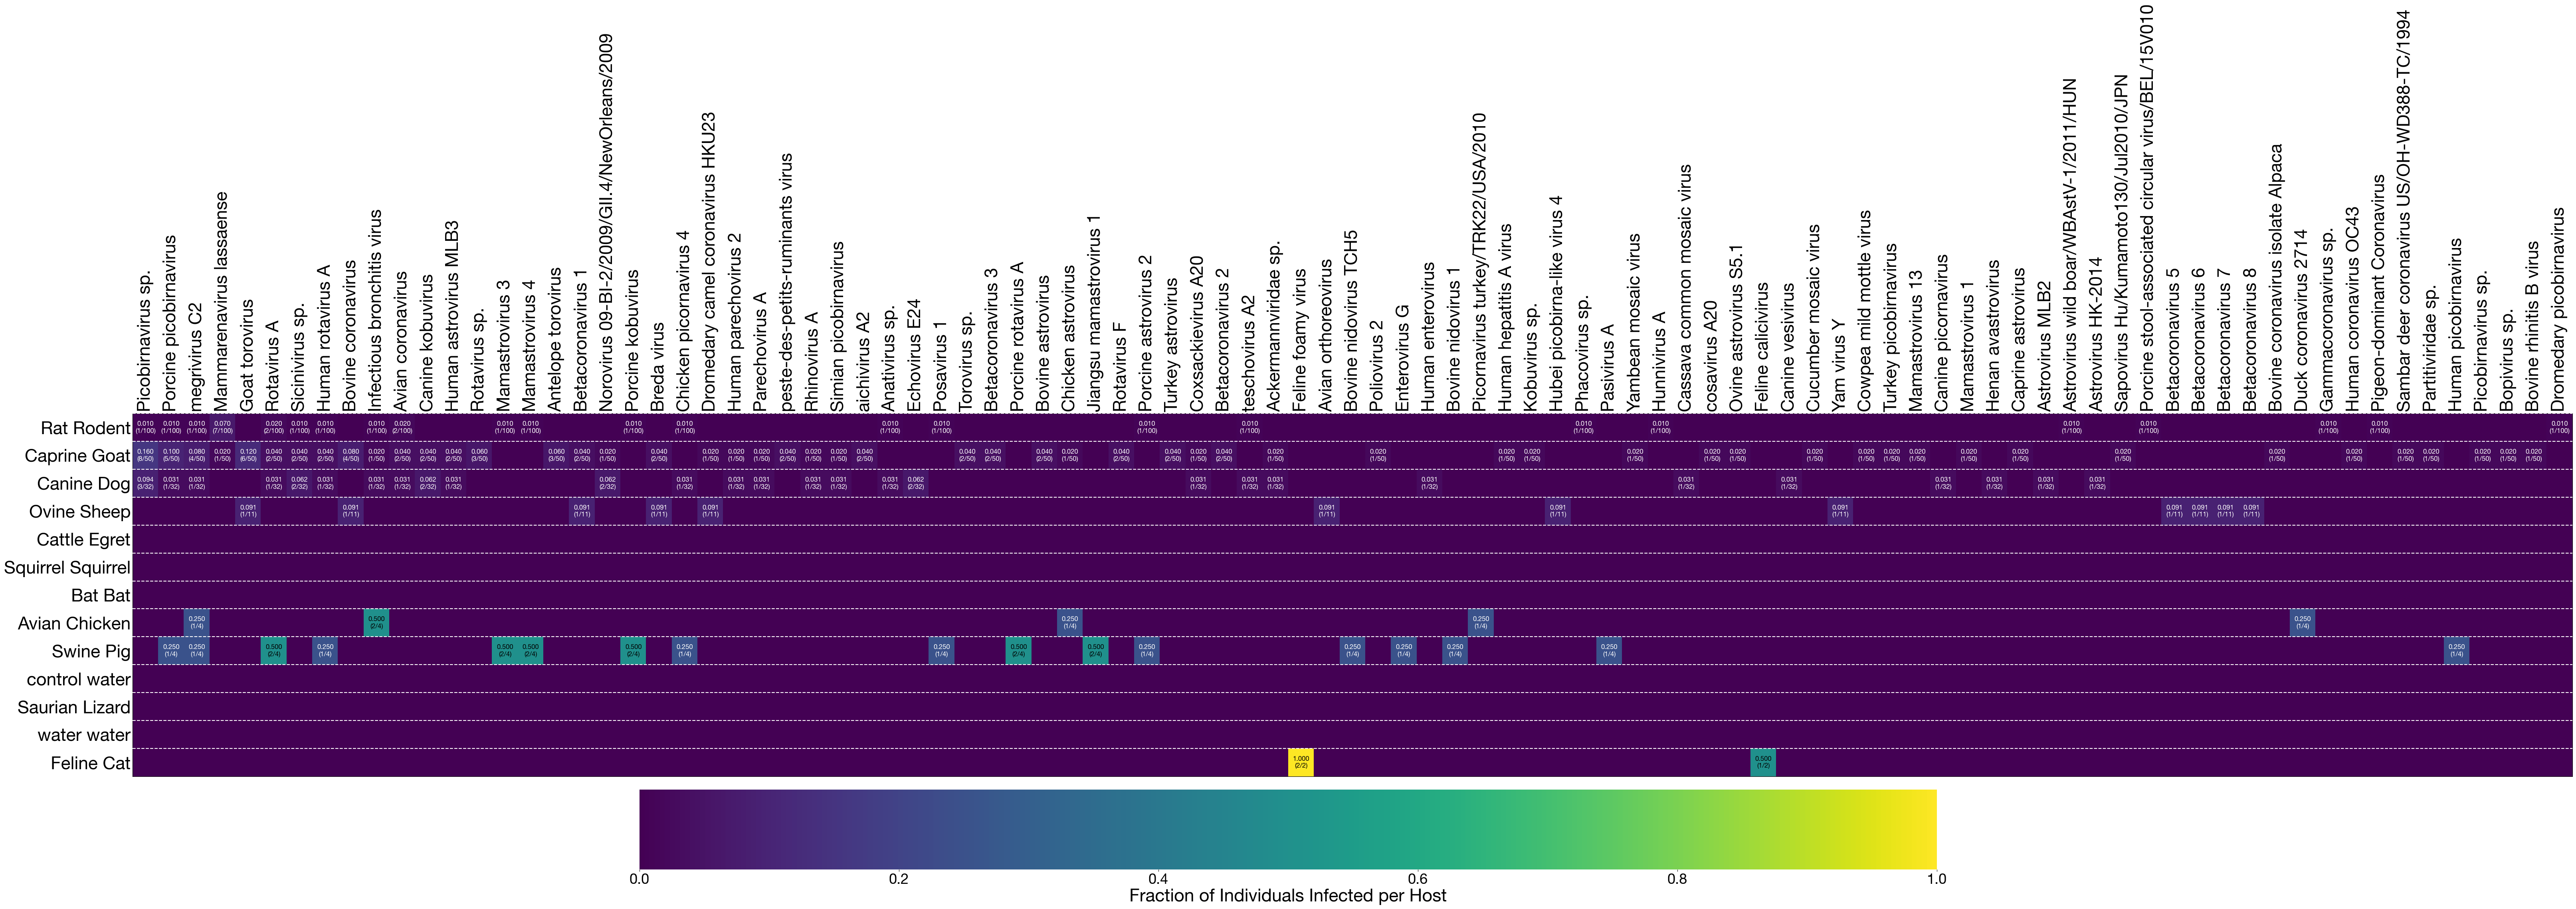

2025-01-17 10:29:28,151 - INFO - Displayed heatmap.
2025-01-17 10:29:28,151 - INFO - Displayed heatmap.
2025-01-17 10:29:28,151 - INFO - Displayed heatmap.
2025-01-17 10:29:28,151 - INFO - Displayed heatmap.
2025-01-17 10:29:28,151 - INFO - Displayed heatmap.
2025-01-17 10:29:28,151 - INFO - Displayed heatmap.
2025-01-17 10:29:28,151 - INFO - Displayed heatmap.
2025-01-17 10:29:28,151 - INFO - Displayed heatmap.
2025-01-17 10:29:28,151 - INFO - Displayed heatmap.
2025-01-17 10:29:28,151 - INFO - Displayed heatmap.
2025-01-17 10:29:28,151 - INFO - Displayed heatmap.
2025-01-17 10:29:28,151 - INFO - Displayed heatmap.
2025-01-17 10:29:28,151 - INFO - Displayed heatmap.
2025-01-17 10:29:28,151 - INFO - Displayed heatmap.
2025-01-17 10:29:28,151 - INFO - Displayed heatmap.
2025-01-17 10:29:28,151 - INFO - Displayed heatmap.
2025-01-17 10:29:28,151 - INFO - Displayed heatmap.


In [49]:
import os
import json
import re
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import logging

def setup_logging():
    """
    Set up logging to file and console.
    """
    logger = logging.getLogger()
    logger.setLevel(logging.DEBUG)
    
    # File handler
    fh = logging.FileHandler('unmatched_samples.log')
    fh.setLevel(logging.WARNING)
    
    # Console handler
    ch = logging.StreamHandler()
    ch.setLevel(logging.INFO)
    
    # Formatter
    formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
    fh.setFormatter(formatter)
    ch.setFormatter(formatter)
    
    # Add handlers
    logger.addHandler(fh)
    logger.addHandler(ch)
    
    return logger

def load_metadata(csv_path):
    """
    Load metadata from a CSV file into a pandas DataFrame.

    Parameters:
        csv_path (str): Path to the Metada_annotated.csv file.

    Returns:
        pd.DataFrame: DataFrame containing the metadata.
    """
    try:
        # Attempt to read as comma-separated
        metadata_df = pd.read_csv(csv_path, sep=',')
        logging.info("Successfully loaded metadata as comma-separated.")
    except pd.errors.ParserError:
        try:
            # If comma-separated fails, try tab-separated
            metadata_df = pd.read_csv(csv_path, sep='\t')
            logging.info("Successfully loaded metadata as tab-separated.")
        except Exception as e:
            logging.error(f"Failed to load metadata CSV: {e}")
            raise e
    
    # Strip whitespace from column names
    metadata_df.columns = metadata_df.columns.str.strip()
    
    # Check for required columns
    required_columns = ['oldIDseqName', 'NewID', 'ska_genus', 'ska_species']
    for col in required_columns:
        if col not in metadata_df.columns:
            logging.error(f"Missing required column '{col}' in metadata.")
            raise KeyError(f"Missing required column '{col}' in metadata.")
    
    # Set 'oldIDseqName' as the index for easy lookup
    metadata_df.set_index('oldIDseqName', inplace=True)
    
    logging.info(f"Loaded metadata for {len(metadata_df)} samples.")
    return metadata_df

def compile_sample_id_pattern(metadata_keys):
    """
    Compile a regex pattern to extract base sample IDs based on 'oldIDseqName'.

    Parameters:
        metadata_keys (list): List of 'oldIDseqName' keys from metadata.

    Returns:
        re.Pattern: Compiled regex pattern.
    """
    # Escape all keys to handle any special regex characters
    escaped_keys = [re.escape(key) for key in metadata_keys]
    # Join them into a single pattern with alternation
    pattern = re.compile(r'^(' + '|'.join(escaped_keys) + r')_')
    return pattern

def extract_base_sample_id(sample, pattern):
    """
    Extract the base sample ID by matching against the compiled regex pattern.

    Parameters:
        sample (str): The full sample ID from virus.json.
        pattern (re.Pattern): Compiled regex pattern to extract 'oldIDseqName'.

    Returns:
        str or None: The base sample ID matching 'oldIDseqName' in metadata, or None if no match.
    """
    match = pattern.match(sample)
    if match:
        return match.group(1)
    else:
        # If no match, return None to indicate unmatched sample
        return None

def map_viruses_to_species(virus_dict, metadata_df, pattern):
    """
    Map each virus to the species of its associated samples.

    Parameters:
        virus_dict (dict): Dictionary loaded from virus.json.
        metadata_df (pd.DataFrame): DataFrame containing metadata.
        pattern (re.Pattern): Compiled regex pattern to extract base sample IDs.

    Returns:
        dict: A nested dictionary where each key is a virus ID and its value is another dictionary mapping species to counts.
        set: A set of all unique species.
        Counter: A Counter object with species counts.
    """
    # Function to get species name from metadata
    def sample_species(row):
        return f"{row['ska_genus']} {row['ska_species']}"
    
    # Extract species names from metadata
    metadata_df['species'] = metadata_df.apply(sample_species, axis=1)
    spp = metadata_df['species'].tolist()
    species = set(spp)
    spp_count = Counter(spp)
    
    # Initialize vir_species with virus IDs as keys and species counts as values
    vir_species = {v: {s: 0 for s in species} for v in virus_dict}
    logging.info(f"Initialized vir_species for {len(vir_species)} viruses.")
    
    # Iterate over each virus and its associated samples
    unmatched_samples = set()
    for virus_id, virus_info in virus_dict.items():
        samples = virus_info.get('samples', [])
        for sample in samples:
            base_sample_id = extract_base_sample_id(sample, pattern)
            if base_sample_id and base_sample_id in metadata_df.index:
                species_name = metadata_df.at[base_sample_id, 'species']
                vir_species[virus_id][species_name] += 1
            else:
                if sample not in unmatched_samples:
                    logging.warning(f"Sample ID '{sample}' from virus '{virus_id}' not found in metadata.")
                    unmatched_samples.add(sample)
    
    logging.info(f"Total matched samples: {len(metadata_df) - len(unmatched_samples)}")
    logging.info(f"Total unmatched samples: {len(unmatched_samples)}")
    return vir_species, species, spp_count

def prepare_dataframe(vir_species, species, spp_count):
    """
    Prepare a normalized DataFrame for visualization with species as rows and viruses as columns.

    Parameters:
        vir_species (dict): Nested dictionary mapping viruses to species counts.
        species (set): Set of unique species.
        spp_count (Counter): Counter object with species counts.

    Returns:
        pd.DataFrame: Normalized DataFrame with fractions of infected individuals.
    """
    # Create a DataFrame from vir_species
    df = pd.DataFrame.from_dict(vir_species, orient='index')
    logging.info(f"DataFrame shape before transposing: {df.shape}")
    
    # Transpose to have species as rows and viruses as columns
    df = df.T
    logging.info(f"DataFrame shape after transposing: {df.shape}")
    
    # Sort viruses by total counts in descending order
    df = df.loc[:, df.sum(axis=0).sort_values(ascending=False).index]
    logging.info("Sorted viruses by total counts.")
    
    # Sort species based on count and name
    sorted_species = sorted(species, key=lambda w: (-spp_count[w], w))
    df = df.loc[sorted_species]
    logging.info("Sorted species by counts and names.")
    
    # Normalize by species count to get fraction
    df_normalized = df.divide(spp_count, axis='index')
    logging.info("Normalized DataFrame by species counts.")
    
    return df_normalized

def generate_heatmap(df_normalized, vir_species, species, spp_count, virus_dict):
    """
    Generate and display a heatmap of fraction of individuals infected per species by virus.

    Parameters:
        df_normalized (pd.DataFrame): Normalized DataFrame with fractions.
        vir_species (dict): Nested dictionary mapping viruses to species counts.
        species (set): Set of unique species.
        spp_count (Counter): Counter object with species counts.
        virus_dict (dict): Original virus dictionary loaded from virus.json.
    """
    fig = plt.figure(figsize=(65, 20), facecolor='w')
    gs = gridspec.GridSpec(1, 1)
    ax = plt.subplot(gs[0], facecolor='w')
    
    # Create the heatmap
    heatmap = ax.matshow(df_normalized, cmap=mpl.cm.viridis)
    logging.info("Created heatmap matrix.")
    
    # Add text annotations
    for c, col in enumerate(df_normalized.columns):
        for r, row in enumerate(df_normalized.index):
            count = vir_species[col][row]
            if count > 0:
                total = spp_count[row]
                frac = count / total
                fc = 'k' if frac >= 0.4 else 'w'
                ax.text(c, r, f"{frac:.3f}\n({count}/{total})", color=fc, va='center', ha='center', fontsize=12)
    
    # Add horizontal lines to separate genera
    store_genus = None
    for s, S in enumerate(df_normalized.index):
        genus = S.split(' ')[0]
        if store_genus != genus:
            ax.axhline(s - 0.5, color='w', ls='--', zorder=100)
            store_genus = genus
    
    # Set y-axis labels (species)
    ax.set_yticks(range(len(df_normalized.index)))
    ax.set_yticklabels(df_normalized.index, style='italic', fontsize=45)
    
    # Filter out viruses with name 'TBD'
    filtered_viruses = [v for v in df_normalized.columns if virus_dict[v].get('name') != 'TBD']
    df_normalized_filtered = df_normalized[filtered_viruses]
    vir_species_filtered = {v: vir_species[v] for v in filtered_viruses}
    
    # Set x-axis labels (viruses)
    ax.xaxis.tick_top()
    ax.set_xticks(range(len(filtered_viruses)))
    ax.set_xticklabels(
        [virus_dict[v].get('name', v) for v in filtered_viruses],
        rotation=90,
        fontsize=45
    )
    
    ax.tick_params(size=0, labelsize=32)
    ax.set_aspect('auto')
    
    # Add colorbar
    axcb = fig.add_axes([0.25, -0.1, 0.5, 0.1], frame_on=False)
    cb = mpl.colorbar.ColorbarBase(
        axcb,
        cmap=mpl.cm.viridis,
        orientation='horizontal',
        alpha=1.0,
        drawedges=False
    )
    cb.set_label('Fraction of Individuals Infected per Host', fontsize=32)
    cb.ax.tick_params(labelsize=26)
    
    plt.tight_layout()
    plt.savefig("/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/1coinfectio_heatmap_family.png", dpi=300)
    plt.savefig("/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/1coinfectio_heatmap_family.pdf", dpi=300)
    plt.savefig("/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/1coinfectio_heatmap_family.svg", dpi=300)

    plt.show()
    logging.info("Displayed heatmap.")

def main():
    """
    Main function to execute the data processing and visualization.
    """
    # Initialize logging
    logger = setup_logging()
    
    # Define the base path where your data files are located
    base_path = '/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/'  # <-- Replace this with your actual path
    
    # Define paths to the data files
    metadata_csv = os.path.join(base_path, 'Metada_annotated.csv')
    virus_json = os.path.join(base_path, 'virus_RNA.json')
    
    # Check if files exist
    if not os.path.exists(metadata_csv):
        logging.error(f"Metadata CSV file not found at '{metadata_csv}'. Please check the path.")
        return
    if not os.path.exists(virus_json):
        logging.error(f"Virus JSON file not found at '{virus_json}'. Please check the path.")
        return
    
    # Load the metadata
    try:
        metadata_df = load_metadata(metadata_csv)
    except Exception as e:
        logging.error(f"Failed to load metadata: {e}")
        return
    
    # Compile regex pattern for sample ID extraction
    pattern = compile_sample_id_pattern(list(metadata_df.index))
    
    # Load the virus data
    try:
        with open(virus_json, 'r') as in_json:
            virus = json.load(in_json)
            logging.info(f"Loaded virus data with {len(virus)} viruses.")
    except json.JSONDecodeError as e:
        logging.error(f"Error loading JSON file: {e}")
        return
    except Exception as e:
        logging.error(f"Unexpected error loading JSON file: {e}")
        return
    
    # Filter out viruses with name 'TBD'
    filtered_virus = {v: info for v, info in virus.items() if info.get('name') != 'TBD'}
    excluded_viruses = set(virus.keys()) - set(filtered_virus.keys())
    if excluded_viruses:
        logging.info(f"Excluded {len(excluded_viruses)} viruses with name 'TBD'.")
    virus = filtered_virus  # Update the virus dictionary to exclude 'TBD' names
    
    # Map viruses to species
    vir_species, species, spp_count = map_viruses_to_species(virus, metadata_df, pattern)
    
    # Prepare the DataFrame
    df_normalized = prepare_dataframe(vir_species, species, spp_count)
    
    # Generate the heatmap
    generate_heatmap(df_normalized, vir_species, species, spp_count, virus)

if __name__ == "__main__":
    main()
